In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [3]:
data=pd.read_csv('drug200.csv')
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
new_data = data.drop(['Sex'],axis=1)
new_data.head()

,Age,BP,Cholesterol,Na_to_K,Drug
0,23,HIGH,HIGH,25.355,drugY
1,47,LOW,HIGH,13.093,drugC
2,47,LOW,HIGH,10.114,drugC
3,28,NORMAL,HIGH,7.798,drugX
4,61,LOW,HIGH,18.043,drugY


In [6]:
full_data = new_data.copy()
full_data['BP']=full_data['BP'].map({'LOW':0,'HIGH':2,'NORMAL':1})
full_data['Cholesterol']=full_data['Cholesterol'].map({'LOW':0,'HIGH':2,'NORMAL':1})
full_data['Drug']=full_data['Drug'].map({'drugY':0,'drugX':1,'drugA':2,'drugB':3,'drugC':4})

full_data.head()

,Age,BP,Cholesterol,Na_to_K,Drug
0,23,2,2,25.355,0
1,47,0,2,13.093,4
2,47,0,2,10.114,4
3,28,1,2,7.798,1
4,61,0,2,18.043,0


In [7]:
x = full_data[['Age','BP','Cholesterol','Na_to_K']]
y = full_data['Drug']

In [8]:
full_data.isnull().sum()

Age            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [9]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x,y)

DecisionTreeRegressor(random_state=0)

In [10]:
regressor.predict([[22,1,1,10]])

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([1.])

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 10)

In [12]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [13]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [14]:
print(model.score(x_test,y_test)*100)

100.0


In [15]:
y_predict = model.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_predict,y_test)

<AxesSubplot:>

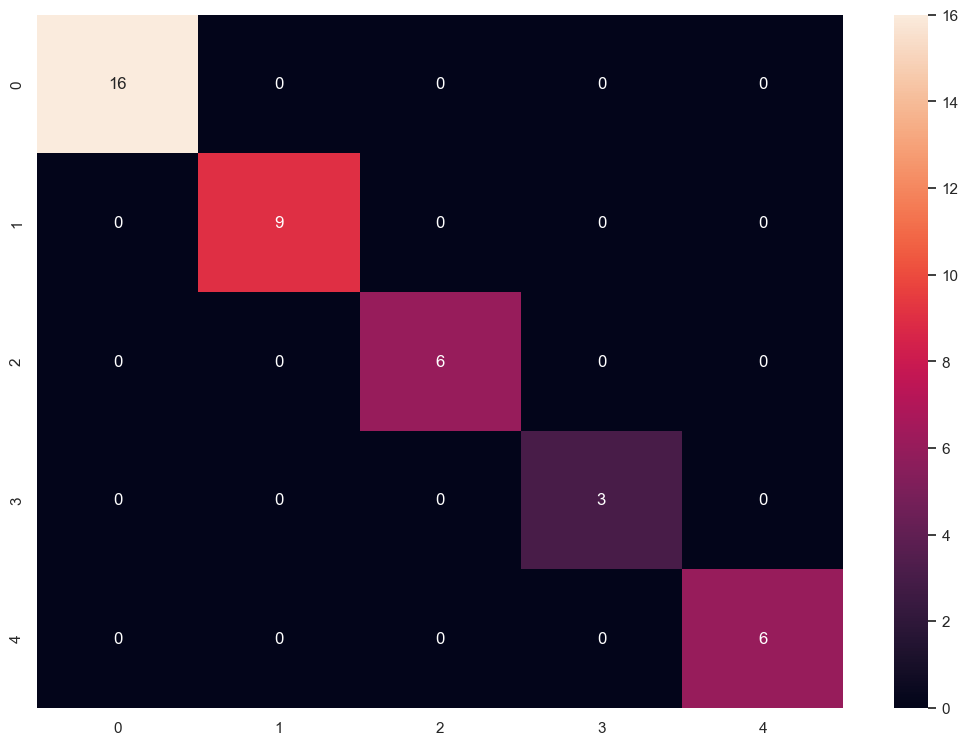

In [17]:
plt.figure(figsize=(13,9))
sns.heatmap(cm,annot=True)